In [40]:
import numpy as np
import cv2
import pandas as pd 
import matplotlib.pyplot as plt

In [41]:
def nose(img):
    
    nose_cascade=cv2.CascadeClassifier("haarcascade_mcs_nose.xml")
    noses=nose_cascade.detectMultiScale(img,1.1,0)
     
    for nose in noses:
        
        x,y,w,h=nose
   
    mustache= cv2.imread("/Users/paruldiwakar/Desktop/codes/data&got/got_filter/mustache.png",-1)
    mustache = cv2.resize(mustache,(w,h))
    
    for i in range(h):
        for j in range(w):
                
            if mustache[i,j,-1]>0:
                    
                img[i+y+30,j+x+10,:]=mustache[i,j,0:3]
    plt.axis('off')
    plt.imshow(img)
    plt.show()            

In [58]:
def eyes(img):
    
    eyes_cascade=cv2.CascadeClassifier("/Users/paruldiwakar/Desktop/codes/haarcascade_eye.xml")
    face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    faces = face_cascade.detectMultiScale(img, 1.1, 4) 
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eyes_cascade.detectMultiScale(roi_color)
        for eye in eyes:
            
            ex,ey,ew,eh= eye
            #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
            x1=np.min([eyes[0][0],eyes[1][0]])
            y1=np.min([eyes[0][1],eyes[1][1]])
            w1=np.max([eyes[0][2],eyes[1][2]])
            h1=np.max([eyes[0][3],eyes[1][3]])
    
    cv2.rectangle(roi_color,(x1-5,y1),(w1+x1+ew+ex+10,h1+y1),(0,255,0),2)
    
    glasses=cv2.imread("/Users/paruldiwakar/Desktop/codes/data&got/got_filter/glasses.png",-1)
    glasses = cv2.resize(glasses,(w1+ew+10,h1+10)) 
    
    for i in range(h1):
        for j in range(w1+ew):
                
            if glasses[i,j,-1]>0:
                    
                    img[y1+ey+i+30,ew+j+ex+10,:]=glasses[i,j,0:3]
    
    plt.imshow(img)
    plt.show()
    
    

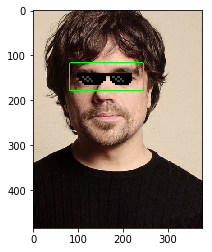

In [59]:
img =cv2.imread("/Users/paruldiwakar/Desktop/codes/pictures/Before.png",-1)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

eyes(img)
# nose(img)

In [32]:
img=np.reshape(img,(-1,3))

In [33]:
img

array([[219, 202, 180],
       [220, 203, 181],
       [219, 202, 180],
       ...,
       [ 19,  13,  13],
       [ 21,  15,  15],
       [ 22,  15,  15]], dtype=uint8)

In [67]:
img = pd.DataFrame(data= img)

In [1]:
img

NameError: name 'img' is not defined

In [27]:
img.to_csv("got_filter.csv",index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [70]:
pd.read_csv("got_filter.csv")

,0,1,2
0,219,202,180
1,220,203,181
2,219,202,180
3,220,203,181
4,219,202,180
5,218,201,179
6,216,199,177
7,216,199,177
8,216,199,177
9,217,200,178
